In [1]:
import sys
import numpy as np

sys.path.extend(['./../lib', './../lib/models', './../helpers'])
from model import Model
from solver import Solver
from solvers_check import SolversCheck
from helpers import init_jupyter

init_jupyter()

Start |  9:08AM MSK on Sep 23, 2019 |
-------------------------------------


In [2]:
m_name = 'fpe_1d_oup'
d_path = './data/' + m_name

MD = Model(m_name)
MD.init(s=1., D=0.5, A=1.)
MD.info()



<div class="head0">
    <div class="head0__name">
        Model problem
    </div>
    <div class="head0__note">
        One-dimensional Focker Planck equation with linear drift (Ornstein–Uhlenbeck process)
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Parameters
    </div>
    <div class="head2__note">
        <ul>
            <li>$s$ - variance of the initial condition (float, default $= 1$)</li>
            <li>$D_c$ - diffusion coefficient (float, default $= 0.5$)</li>
            <li>$A$ - constant drift coefficient (float, default $= 1$)</li>
        </ul>
    </div>
</div>

<div class="head1">
    <div class="head1__name">
        Description
    </div>
</div>

Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv \sqrt{2 D_c} I
    \implies
    D(x, t) \equiv D_c I,
$$
and
$$
    d = 1,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) = A (\mu - x),
    \quad
    \mu \equiv 0,
    \quad
    \rho_0(x) = \frac{1}{\sqrt{2 \pi s}}\exp{\left[-\frac{x^2}{2s}\right]}.
$$

This equation has exact solution for the $d$-dimensional case ([see this paper](https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-019-2214-1))
$$
    \rho(x, t, x_0) =
        \frac{1}{\sqrt{ | 2 \pi \Sigma(t) | }}
        exp \left[
            -\frac{1}{2} (x - M(t, x_0))^T \Sigma^{-1}(t) (x - M(t, x_0))
        \right],
$$
where $x_0$ is an initial condition and
$$
    M(t, x_0) = e^{-A t} x_0 + \left( I - e^{-A t} \right) \mu,
$$
$$
    \Sigma(t) = \int_0^t e^{A (s-t)} S S^T e^{A^T (s-t)} \, d  s,
$$
or in a more simple form for the case $d=1$
$$
    \rho(x, t, x_0) =
        \frac{1}{\sqrt{ | 2 \pi \Sigma(t) | }}
        exp \left[
            -\frac{(x - M(t, x_0))^2}{2 \Sigma(t)}
        \right],
    \quad
    M(t, x_0) = e^{-A t} x_0,
    \quad
    \Sigma(t) = \frac{1 - e^{-2 A t}}{2 A}.
$$

We can rewrite the solution $\rho(x, t, x_0)$ in terms of the initial PDF $\rho_0(x)$ as
$$
    \rho(x, t) = \int_{-\infty}^{\infty}
        \rho(x, t, x_0) \rho_0(x_0) \, d x_0,
$$
which after accurate computations leads to the following analytic solution
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                \sqrt{2 \pi \left( \Sigma(t) + s e^{-2 A t} \right)}
            }
        \exp{\left[
            - \frac
                {
                    x^2
                }
                {
                    2 \left( \Sigma(t) + s e^{-2 A t} \right)
                }
        \right]},
$$
and the stationary solution ($t \rightarrow \infty$) is
$$
    \rho_{stat}(x) =
        \sqrt{
            \frac{A}{\pi}
        }
        e^{-A x^2}.
$$

<div class="note">
    The Ornstein–Uhlenbeck process is mean-reverting (the solution tends to its long-term mean $\mu$ as time $t$ tends to infinity) if $A > 0$ and this process at any time is a normal random variable.
</div>

<div class="end"></div>
    

In [3]:
SL = Solver(model=MD)
SL.set_grid_t(1000, 0., 8., t_hst=10)
SL.set_grid_x(101, -5., 5.)
SL.prep()
SL.calc()
SL.info()

Solve: 100%|█| 999/999 [00:03<00:00, 282.41step/s, | At T=8.0e+00 : er=1.0e-05 es=1.0e-05]

----------- Solver
Format    : 1D, NP [order=2]
Grid t    : poi =      1000, min =    0.0000, max =    8.0000
Grid x    : poi =       101, min =   -5.0000, max =    5.0000
Time sec  : prep = 2.28e-02, calc = 3.49e+00, spec = 4.81e-02
Err real  : 1.00e-05
Err stat  : 1.01e-05


<div class="head1">
    <div class="head1__name">
        Solution visualization
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Solution near the boundaries
    </div>
</div>

--- Solution at spatial point
X = [-5.0e+00]


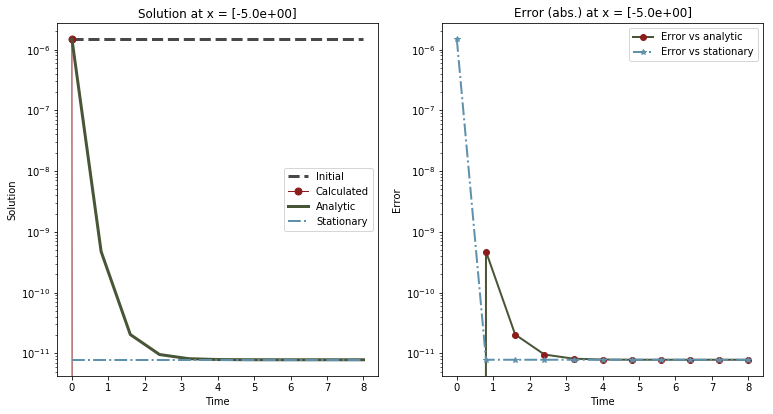

--- Solution at spatial point
X = [ 5.0e+00]


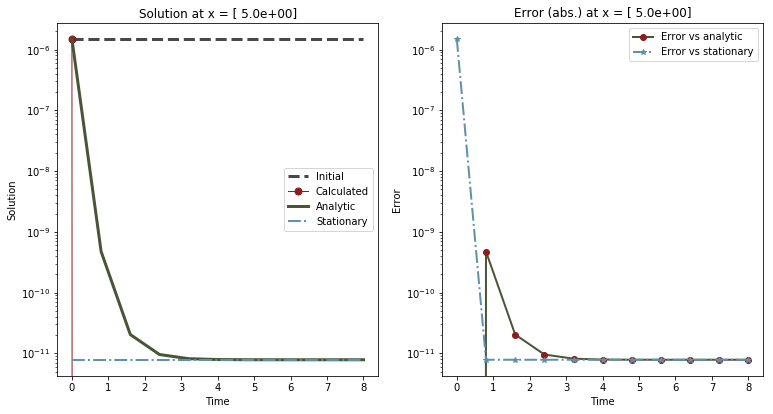

In [5]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': True, 'with_err_stat': True }
SL.plot_t(x_min, opts)
SL.plot_t(x_max, opts)

<div class="head2">
    <div class="head2__name">
        Solution in the inner points
    </div>
</div>

--- Solution at spatial point
X = [-2.5e+00]


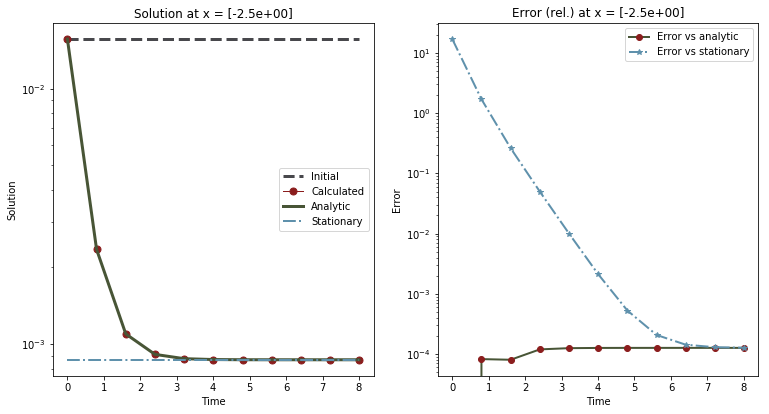

--- Solution at spatial point
X = [ 3.1e-16]


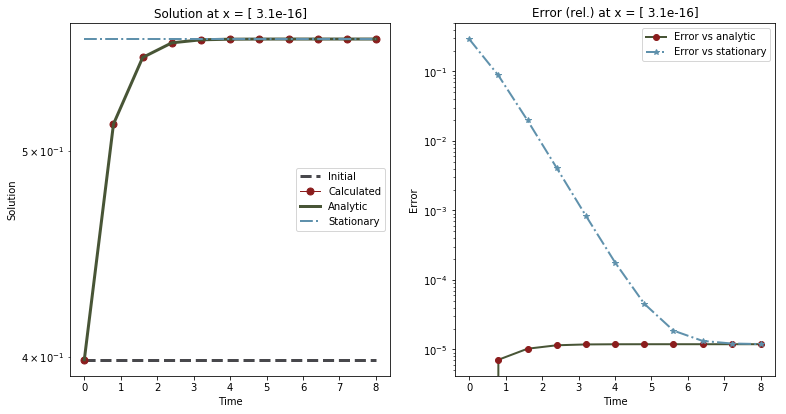

--- Solution at spatial point
X = [ 2.5e+00]


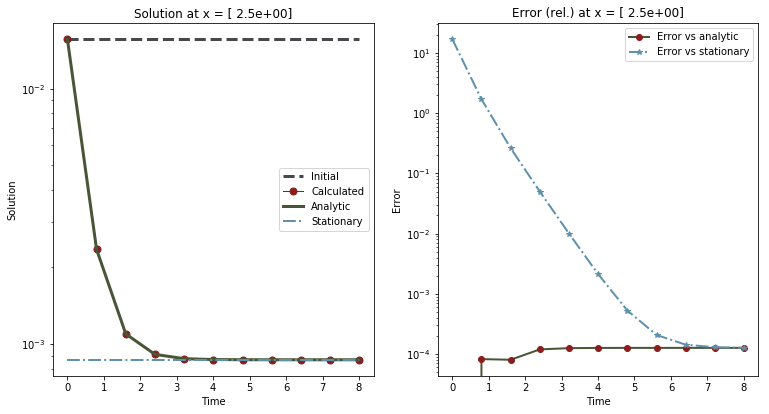

In [6]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_t(-2.5, opts)
SL.plot_t(+0.0, opts)
SL.plot_t(+2.5, opts)

<div class="head2">
    <div class="head2__name">
        Solution for different time moments
    </div>
</div>

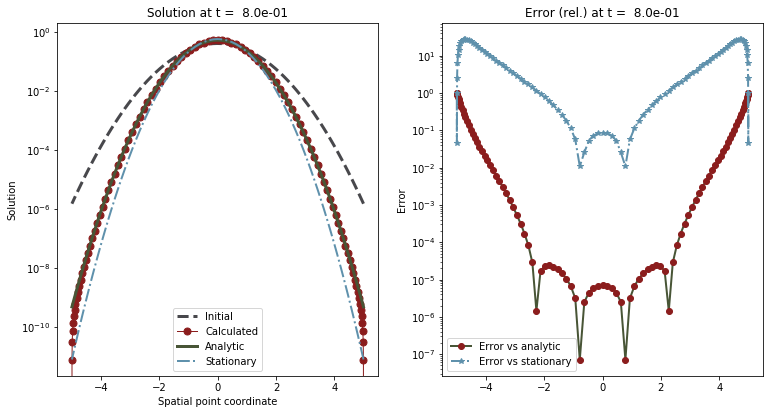

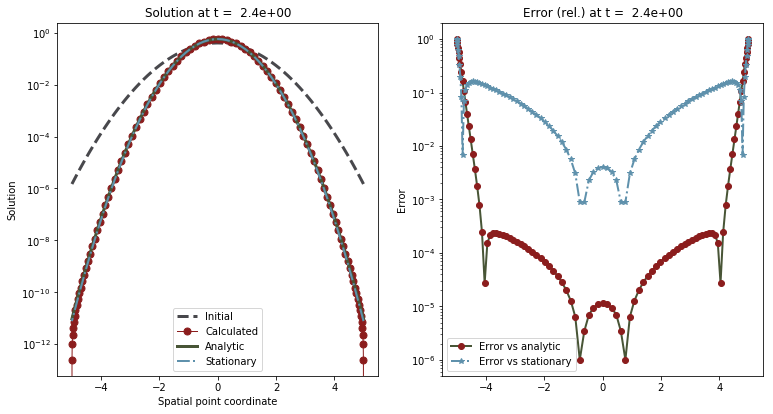

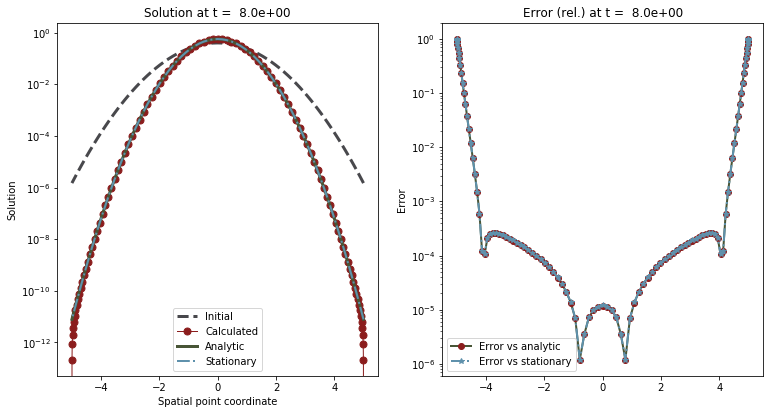

In [7]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_x(+0.1, opts)
SL.plot_x(+2.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see file `multi_solve.ipynb`).
    </div>
</div>

In [4]:
SLC = SolversCheck(d_path)
SLC.load()

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

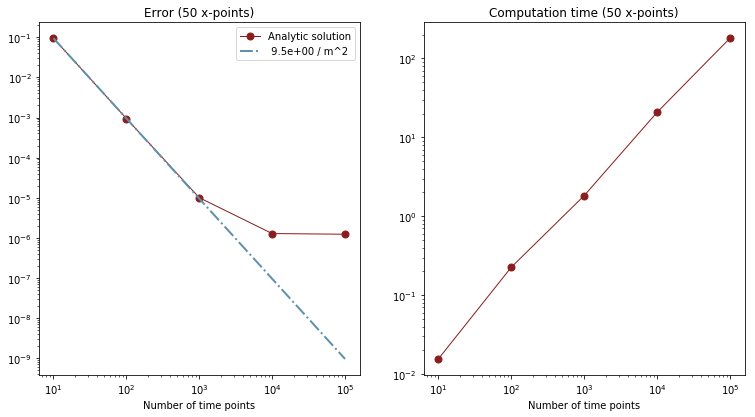

In [6]:
SLC.plot(name2, n=n, is_stat=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

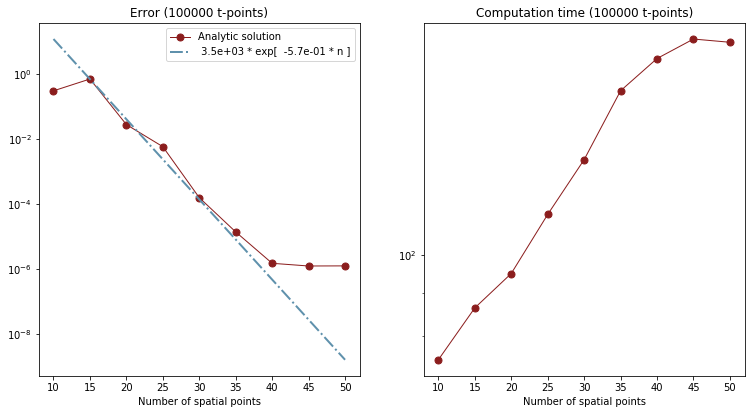

In [7]:
SLC.plot(name2, m=m, is_stat=False, lims={ 'all': [1, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver order
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solvers of various orders.
    </div>
</div>

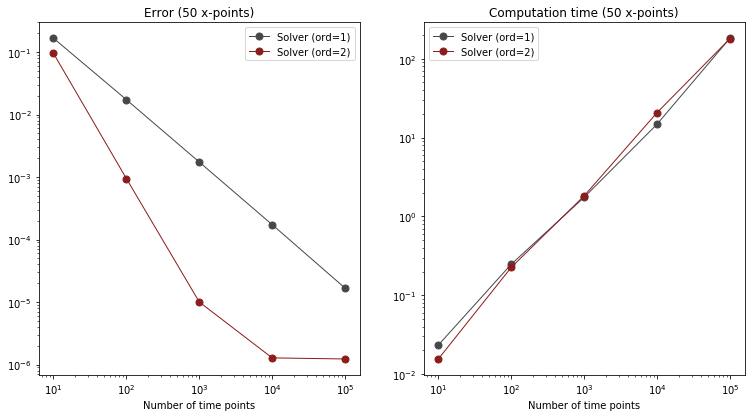

In [8]:
SLC.plot_all(n=n, is_stat=False)

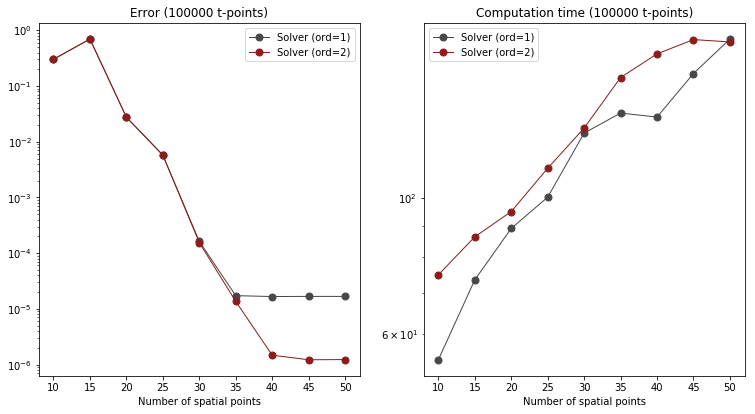

In [9]:
SLC.plot_all(m=m, is_stat=False)

<div class="head1">
    <div class="head1__name">
        Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [13]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [14]:
d = 1
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [15]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)
    print()
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.semilogy()
    plt.show()

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the 1st order splitting
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ with step $h$ and uniform spatial grid with step $l$ using 2th order finite difference scheme

$$
    \frac{\partial \rho}{\partial t} = (D + \widehat{Q}) \rho,
$$
where
$$
    \widehat{Q} \rho = f Q \rho - \frac{\partial f}{\partial x} \rho,
$$

$$
    D = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right),
    \quad
    Q = \frac{1}{2 l} tridiag \left( -1, 0, 1 \right).
$$

Let apply the 1th order splitting method on the time step $(k+1)$
$$
    \frac{\partial v}{\partial t} = D v,
    \quad
    v_{k} = \rho_{k},
    \quad
    v_{k+1} = v = ?,
$$
$$
    \frac{\partial w}{\partial t} = \widehat{Q} w,
    \quad
    w_{k} = v,
    \quad
    w_{k+1} = \rho_{k+1} = ?,
$$
and solve both ODEs by the 1th order Euler method.

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 6.92e-03    
Total time (sec)         : 1.38e-01    



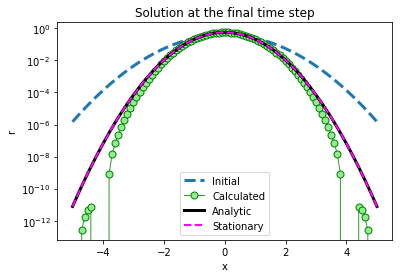

In [16]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

Q = sp.spdiags([
        [-1.] * n,
        [+1.] * n
    ], [-1,  1], n, n).tocsr().toarray()
Q = Q * (0.5 / l)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.
ZD = h * D
ZQ = h * Q

r = func_r0(X)
r = r.reshape(-1, 1)
for t in T[1:]:
    F0 = np.diag(func_f0(X, t).reshape(-1))
    F1 = np.diag(func_f1(X, t).reshape(-1))
    v1 = r + ZD @ r
    w1 = v1 - F0 @ ZQ @ v1 - h * F1 @ v1
    r = w1

show_x(X, r.reshape(-1), time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Plots for the paper
    </div>
</div>

In [5]:
import sys
import numpy as np
import matplotlib as mpl

mpl.rc('font', **{'size'   : 18})
mpl.rcParams.update({
    "font.family": "normal",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
})
mpl.rcParams['text.usetex'] = True

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_context('paper', font_scale=3.0)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'

sys.path.extend(['./../lib', './../helpers'])
from config import config
from solver import Solver
from solvers_check import SolversCheck

In [16]:
pal = sns.color_palette()

data_path = './data/eq-1d_drift-linear_analyt'
figs_path = './../../paper_fpcross/text/fig_'

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

line_calc = {
    'linestyle': '-',
    'linewidth': 1,
    'color': '#8b1d1d',
    'marker': 'o',
    'markersize': 7,
    'markerfacecolor': '#8b1d1d',
    'markeredgewidth': 1,
    'markeredgecolor': '#8b1d1d',
}
line_appr = {
    'linestyle': '-.',
    'linewidth': 2,
    'color': '#5f91ac',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#5f91ac',
    'markeredgewidth': 0,
    'markeredgecolor': '#5f91ac',
}

SLC = SolversCheck(data_path)
SLC.load()

M = SLC.res[name2]['M'].copy()
N = SLC.res[name2]['N'].copy()

<div class="head2">
    <div class="head2__name">
        Error (real) vs number of time points for the 2th order solver
    </div>
</div>

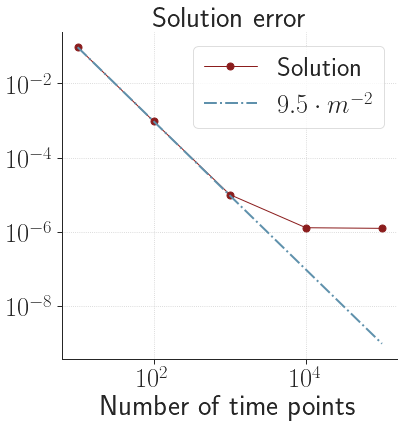

In [17]:
n = N[-1]
x = np.array(M)
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['err'] for m in M])

# a, b = np.polyfit(1./x**2, y, 1)
a = +9.5E+0
z = a / x**2
s_appr = r'$9.5 \cdot m^{-2}$'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.plot(x, z, label=s_appr, **line_appr)
ax.set_title('Solution error')
ax.set_xlabel('Number of time points')
ax.set_ylabel('')
ax.semilogx()
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_e-vs-m.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Computation time vs number of time points for the 2th order solver
    </div>
</div>

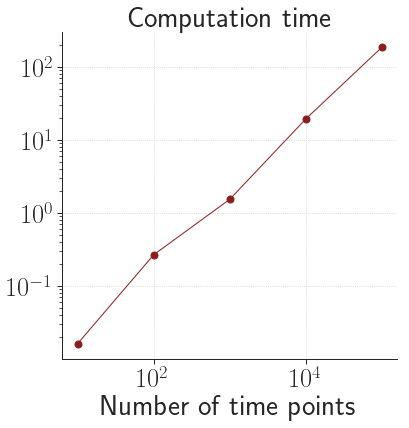

In [18]:
n = N[-1]
x = np.array(M)
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['t_calc'] for m in M])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.set_title('Computation time')
ax.set_xlabel('Number of time points')
ax.set_ylabel('')
ax.semilogx()
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-vs-m.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Error vs number of spatial points (2th order solver)
    </div>
</div>

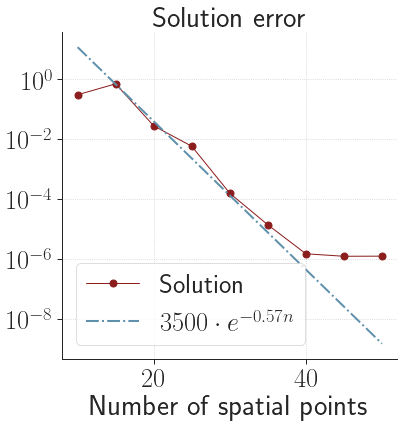

In [19]:
m = M[-1]
x = np.array(N, dtype='float')
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['err'] for n in N])

# b, a = np.polyfit(x[1:None], np.log(x[1:None]), 1, w=np.sqrt(y[1:None]))
# a = np.exp(a)
# s_appr = '%8.1e * exp[ %9.1e * n ]'%(a, b)

a = +3.5E+3
b = -5.7E-1
z = a * np.exp(b * x)
s_appr = '$3500 \cdot e^{-0.57 n}$'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.plot(x, z, label=s_appr, **line_appr)
ax.set_title('Solution error')
ax.set_xlabel('Number of spatial points')
ax.set_ylabel('')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_e-vs-n.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Computation time vs number of spatial points for the 2th order solver
    </div>
</div>

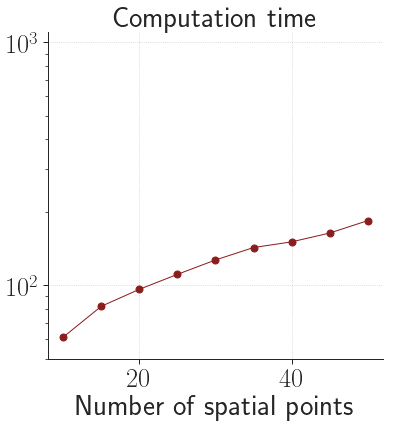

In [20]:
m = M[-1]
x = np.array(N)
y = np.array([SLC.res[name2]['%d-%d'%(m, n)]['t_calc'] for n in N])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, y, label='Solution', **line_calc)
ax.set_ylim(5.0E+1, 1.1E+3)
ax.set_title('Computation time')
ax.set_xlabel('Number of spatial points')
ax.set_ylabel('')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-vs-n.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Solution in the central spatial point vs time
    </div>
</div>

In [21]:
line_init = {
    'linestyle': '--',
    'linewidth': 3,
    'color': '#48484c',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#48484c',
    'markeredgewidth': 0,
    'markeredgecolor': '#48484c',
}
line_calc = {
    'linestyle': '-',
    'linewidth': 1,
    'color': '#8b1d1d',
    'marker': 'o',
    'markersize': 7,
    'markerfacecolor': '#8b1d1d',
    'markeredgewidth': 1,
    'markeredgecolor': '#8b1d1d',
}
line_real = {
    'linestyle': '-',
    'linewidth': 3,
    'color': '#485536',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#485536',
    'markeredgewidth': 0,
    'markeredgecolor': '#485536',
}
line_stat = {
    'linestyle': '-.',
    'linewidth': 2,
    'color': '#5f91ac',
    'marker': 'o',
    'markersize': 0,
    'markerfacecolor': '#5f91ac',
    'markeredgewidth': 0,
    'markeredgecolor': '#5f91ac',
}
line_err_real = {
    'linestyle': '-',
    'linewidth': 2,
    'color': '#485536',
    'marker': 'o',
    'markersize': 6,
    'markerfacecolor': '#8b1d1d',
    'markeredgewidth': 1,
    'markeredgecolor': '#8b1d1d',
}
line_err_stat = {
    'linestyle': '-.',
    'linewidth': 2,
    'color': '#5f91ac',
    'marker': '*',
    'markersize': 6,
    'markerfacecolor': '#5f91ac',
    'markeredgewidth': 1,
    'markeredgecolor': '#5f91ac',
}

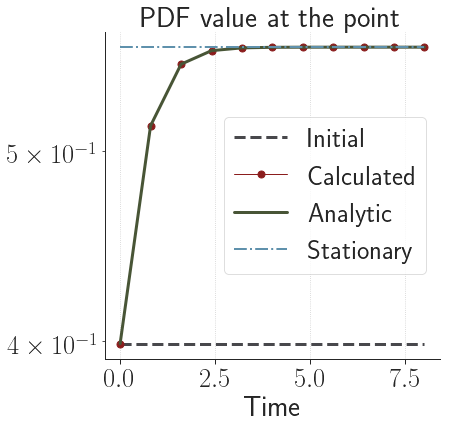

In [22]:
x = np.array([0.])
i = SL._sind(x)
x = SL.X_hst[:, i].reshape(-1, 1)
t = SL.T_hst
v = np.ones(t.shape[0])

r_init = v * SL.func_r0(x)[0]
r_stat = v * SL.func_rs(x)[0]
r_real = np.array([SL.func_rt(x, t_)[0] for t_ in t])
r_calc = np.array([r[i] for r in SL.R_hst])

x = [SL.t_min] + list(t)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, [r_init[0]] + list(r_init), label='Initial', **line_init)
ax.plot(x, [r_init[0]] + list(r_calc), label='Calculated', **line_calc)
ax.plot(x, [r_init[0]] + list(r_real), label='Analytic', **line_real)
ax.plot(x, [r_stat[0]] + list(r_stat), label='Stationary', **line_stat)

ax.set_title('PDF value at the point')
ax.set_xlabel('Time')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_x-zero-vs-t-res.pgf', bbox_inches='tight')

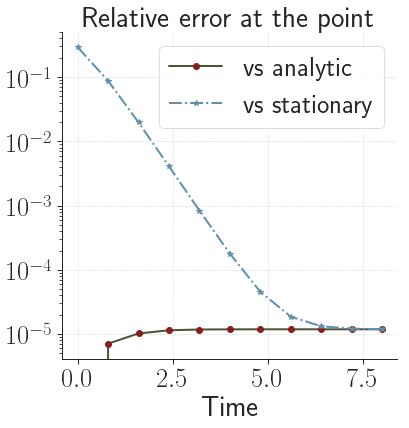

In [23]:
e0 = np.abs(r_stat[0] - r_init[0]) / np.abs(r_stat[0])
e_stat = [e0] + list(np.abs(r_stat - r_calc) / np.abs(r_stat))
e_real = [0.] + list(np.abs(r_real - r_calc) / np.abs(r_real))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, e_real, label='vs analytic', **line_err_real)
ax.plot(x, e_stat, label='vs stationary', **line_err_stat)

ax.set_title('Relative error at the point')
ax.set_xlabel('Time')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_x-zero-vs-t-err.pgf', bbox_inches='tight')

<div class="head2">
    <div class="head2__name">
        Solution at the final time moment
    </div>
</div>

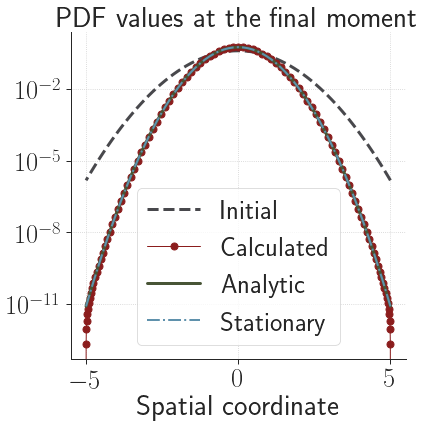

In [24]:
i = -1
t = SL.T_hst[i]
x = SL.X_hst

r_init = SL.func_r0(x)
r_stat = SL.func_rs(x)
r_real = SL.func_rt(x, t)
r_calc = SL.R_hst[i]

x = x.reshape(-1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, r_init, label='Initial', **line_init)
ax.plot(x, r_calc, label='Calculated', **line_calc)
ax.plot(x, r_real, label='Analytic', **line_real)
ax.plot(x, r_stat, label='Stationary', **line_stat)

ax.set_title('PDF values at the final moment')
ax.set_xlabel('Spatial coordinate')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-end-vs-x-res.pgf', bbox_inches='tight')

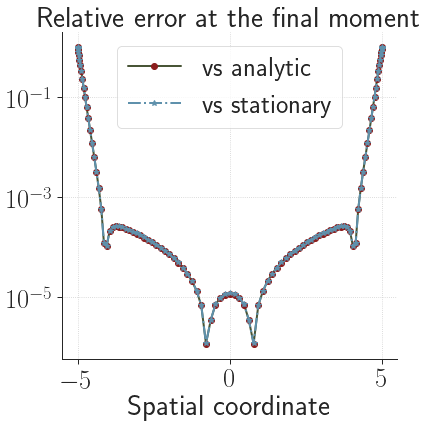

In [25]:
e_real = np.abs(r_real - r_calc) / np.abs(r_real)
e_stat = np.abs(r_stat - r_calc) / np.abs(r_stat)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.plot(x, e_real, label='vs analytic', **line_err_real)
ax.plot(x, e_stat, label='vs stationary', **line_err_stat)

ax.set_title('Relative error at the final moment')
ax.set_xlabel('Spatial coordinate')
ax.semilogy()           
ax.grid(ls=":")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.legend(loc='best', frameon=True)

plt.savefig(figs_path + 'eq-1d_drift-linear_analyt_t-end-vs-x-err.pgf', bbox_inches='tight')

<div class="head1">
    <div class="head1__name">
        Check stationary solution
    </div>
</div>

We calculate rhs (for the large value $\tau$ of time)
$$
    rhs(x)
    =
    \sum_{i=1}^d \sum_{j=1}^d
        \frac{\partial^2}{\partial x_i \partial x_j}
        \left[ D_{ij}(x, \tau) \rho_{stat}(x) \right]
    - \sum_{i=1}^d
        \frac{\partial}{\partial x_i}
        \left[ f_i(x, \tau) \rho_{stat}(x) \right],
$$
using Chebyshev grid and Chebyshev differential matrices ($D_1$, $D_2$)
$$
    \begin{split}
        rhs
        & =
        D_c (D_2 \otimes I \otimes \ldots \otimes I) \rho_{stat} +
        \ldots +
        D_c (I \otimes I \otimes \ldots \otimes D_2) \rho_{stat} -
        \\ & -
        (D_1 \otimes I \otimes \ldots \otimes I) ( f_1 \rho_{stat} ) -
        \ldots -
        (I \otimes I \otimes \ldots \otimes D_1) ( f_d \rho_{stat} ),
    \end{split}
$$
and check if it close to zero.

In [5]:
from intertrain import Intertrain

IT = Intertrain(n=[x_poi], l=[[x_min, x_max]], with_tt=False)
IT.init(func_rs)

I0 = np.eye(x_poi)
J0 = np.eye(x_poi); J0[0, 0] = 0.; J0[-1, -1] = 0.
D1 = IT.dif1()
D2 = IT.dif2()

t = 10.
x = IT.grid()
f = func_f0(x, t)
r = IT.Y.reshape(-1, order='F')

rhs = D_coef * D2 @ r
rhs-= D1 @ (f[0, :] * r)

print('Norm of rho : %-8.2e'%np.linalg.norm(r))
print('Norm of rhs : %-8.2e'%np.linalg.norm(rhs))

Norm of rho : 1.60e+00
Norm of rhs : 2.53e-13


<div class="end"></div>